1. Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import ListedColormap

2. Loading the Dataset

In [2]:
iris = load_iris()
dataset = pd.DataFrame(columns=iris.feature_names, data=iris.data)
dataset['target'] = iris.target

X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

3. Data Preprocessing

In [3]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

4. Visualizing the Original Iris Dataset in 3D

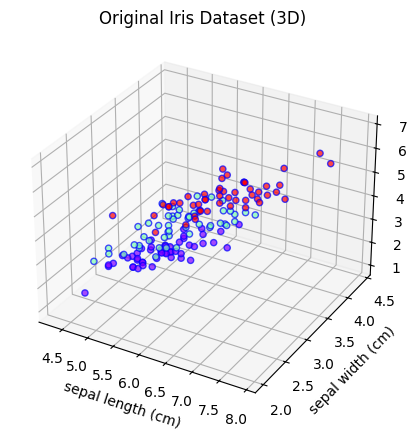

In [4]:
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=y, cmap='rainbow', alpha=0.7, edgecolors='b')
ax.set_xlabel(iris.feature_names[0])
ax.set_ylabel(iris.feature_names[1])
ax.set_zlabel(iris.feature_names[2])
ax.set_title('Original Iris Dataset (3D)')
plt.show()

5. Random Forest Decision Boundary Without LDA

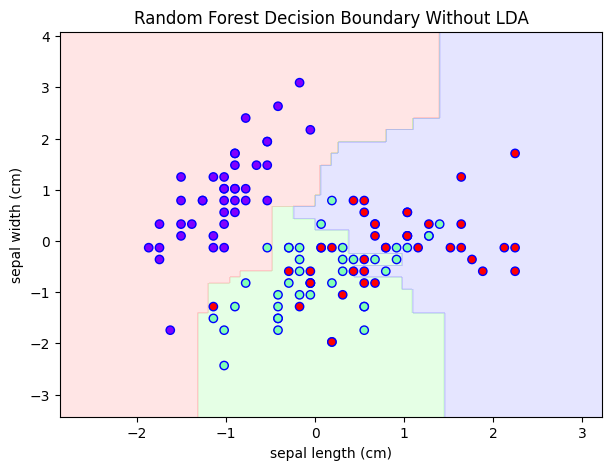

In [5]:
X_train_2D = X_train[:, :2]

rf_without_lda = RandomForestClassifier(max_depth=2, random_state=0)
rf_without_lda.fit(X_train_2D, y_train)

x_min, x_max = X_train_2D[:,0].min() - 1, X_train_2D[:,0].max() + 1
y_min, y_max = X_train_2D[:,1].min() - 1, X_train_2D[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = rf_without_lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
plt.scatter(X_train_2D[:,0], X_train_2D[:,1], c=y_train, cmap='rainbow', edgecolors='b')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Random Forest Decision Boundary Without LDA')
plt.show()

6. Applying LDA

In [6]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)

7. Random Forest Decision Boundary With LDA

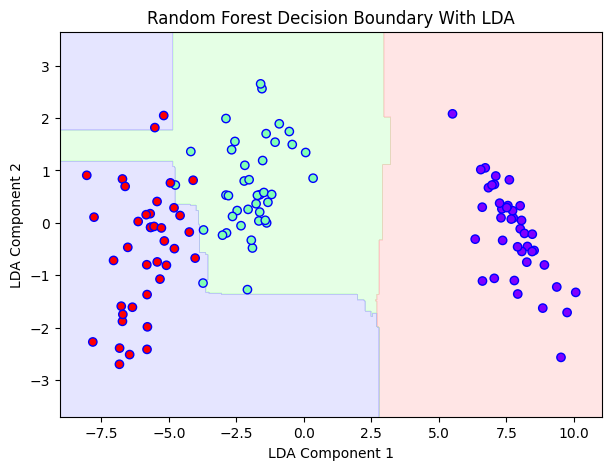

In [7]:
rf_with_lda = RandomForestClassifier(max_depth=2, random_state=0)
rf_with_lda.fit(X_train_lda, y_train)

x_min, x_max = X_train_lda[:,0].min() - 1, X_train_lda[:,0].max() + 1
y_min, y_max = X_train_lda[:,1].min() - 1, X_train_lda[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = rf_with_lda.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7,5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)
plt.scatter(X_train_lda[:,0], X_train_lda[:,1], c=y_train, cmap='rainbow', edgecolors='b')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('Random Forest Decision Boundary With LDA')
plt.show()